In [1]:
import scanpy as sc
import pandas as pd
import infercnvpy as cnv
import numpy as np 

In [2]:
import sys
sys.path.append("/home/augusta/SSS_mount/insituCNV/InSituCNV/modules")
sys.path.append("/home/augusta/SSS_mount/insituCNV/InSituCNV")
import infercnv_pipeline as ip
import insitucnv as icv

# CosMx CNV inference

### Read in dataset
___

In [3]:
sid = '242'

In [4]:
# adata = sc.read(f"/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/{sid}/adata_{sid}_processed_1.h5ad")
adata = sc.read(f"/home/augusta/insituCNV/adata_{sid}_processed_1.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 451314 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

### Read in already procoessed dataset

In [3]:
sid = '221'

In [4]:
adata = sc.read("/home/augusta/insituCNV/CosMx_221_CNVinf.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 347023 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

In [9]:
adata.var

,features_all,features_epi,gene_id,symbol,ensg,chromosome,start,end
A1BG,False,False,ENSG00000121410.12,A1BG,ENSG00000121410.12,chr19,58345178,58353492
A1CF,False,False,ENSG00000148584.15,A1CF,ENSG00000148584.15,chr10,50799409,50885675
A2M,True,False,ENSG00000175899.14,A2M,ENSG00000175899.14,chr12,9067664,9116229
A2ML1,False,False,ENSG00000166535.20,A2ML1,ENSG00000166535.20,chr12,8822621,8887001
A3GALT2,False,False,ENSG00000184389.9,A3GALT2,ENSG00000184389.9,chr1,33306766,33321098
...,...,...,...,...,...,...,...,...
ZXDC,False,False,ENSG00000070476.15,ZXDC,ENSG00000070476.15,chr3,126437601,126475891
ZYG11A,False,False,ENSG00000203995.10,ZYG11A,ENSG00000203995.10,chr1,52842511,52894998
ZYG11B,False,False,ENSG00000162378.13,ZYG11B,ENSG00000162378.13,chr1,52726453,52827336
ZYX,True,True,ENSG00000159840.16,ZYX,ENSG00000159840.16,chr7,143381295,143391111


In [10]:
df =  pd.DataFrame(adata.var_names, columns=["gene_names"])
df.to_csv('CosMx_221_genes.csv')

In [6]:
read_depth = adata.layers['raw'].sum(axis=1)

average_read_depth = read_depth.mean()
average_read_depth

973.1890595147872

In [8]:
adata.obs.nCount_RNA.mean()

987.4355791979206

In [ ]:
adata.obs.nFeature_RNA.mean()

In [7]:
adata.obs

,fov,Area,AspectRatio,CenterX_local_px,CenterY_local_px,Width,Height,Mean.PanCK,Max.PanCK,Mean.CD68_CK8_18,...,pid,add_sub,ROI_status,healthy_ROI,n_counts,leiden,epi_cnv_leiden_res0.1,epi_cnv_leiden_res0.3,epi_cnv_leiden_res0.5,epi_cnv_score_res0.1
c_2_1_2,1,3696,1.04,2565,37,79,76,579,1744,25,...,B1914093_B1-2,epi,TVA2,False,38.0,15,1,6,7,0.002244
c_2_1_5,1,5084,0.88,2961,54,97,110,825,1944,47,...,B1914093_B1-2,epi,TVA2,False,261.0,0,1,3,3,0.002244
c_2_1_7,1,3456,0.57,3023,50,52,91,1015,1920,52,...,B1914093_B1-2,epi,TVA2,False,157.0,0,1,3,3,0.002244
c_2_1_8,1,4471,0.46,3071,55,52,112,1067,2080,47,...,B1914093_B1-2,epi,TVA2,False,175.0,1,1,6,7,0.002244
c_2_1_9,1,2353,0.59,2682,52,46,78,1011,2248,53,...,B1914093_B1-2,epi,TVA2,False,113.0,0,1,1,6,0.002244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_2_209_1539,209,2266,0.68,4205,3856,52,77,178,316,64,...,B1914093_B1-2,epi,TVA3,False,93.0,9,1,1,12,0.002244
c_2_209_1541,209,9202,1.36,4148,3922,155,114,267,1188,72,...,B1914093_B1-2,epi,TVA3,False,114.0,0,1,6,7,0.002244
c_2_209_1542,209,4959,1.12,4057,3927,87,78,303,1044,70,...,B1914093_B1-2,imm,TVA3,False,73.0,12,non-epi,non-epi,non-epi,0.001059
c_2_209_1543,209,9075,0.42,4215,4026,81,193,307,1740,60,...,B1914093_B1-2,epi,TVA3,False,170.0,11,1,1,3,0.002244


... storing 'epi_cnv_leiden_res0.1' as categorical


categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


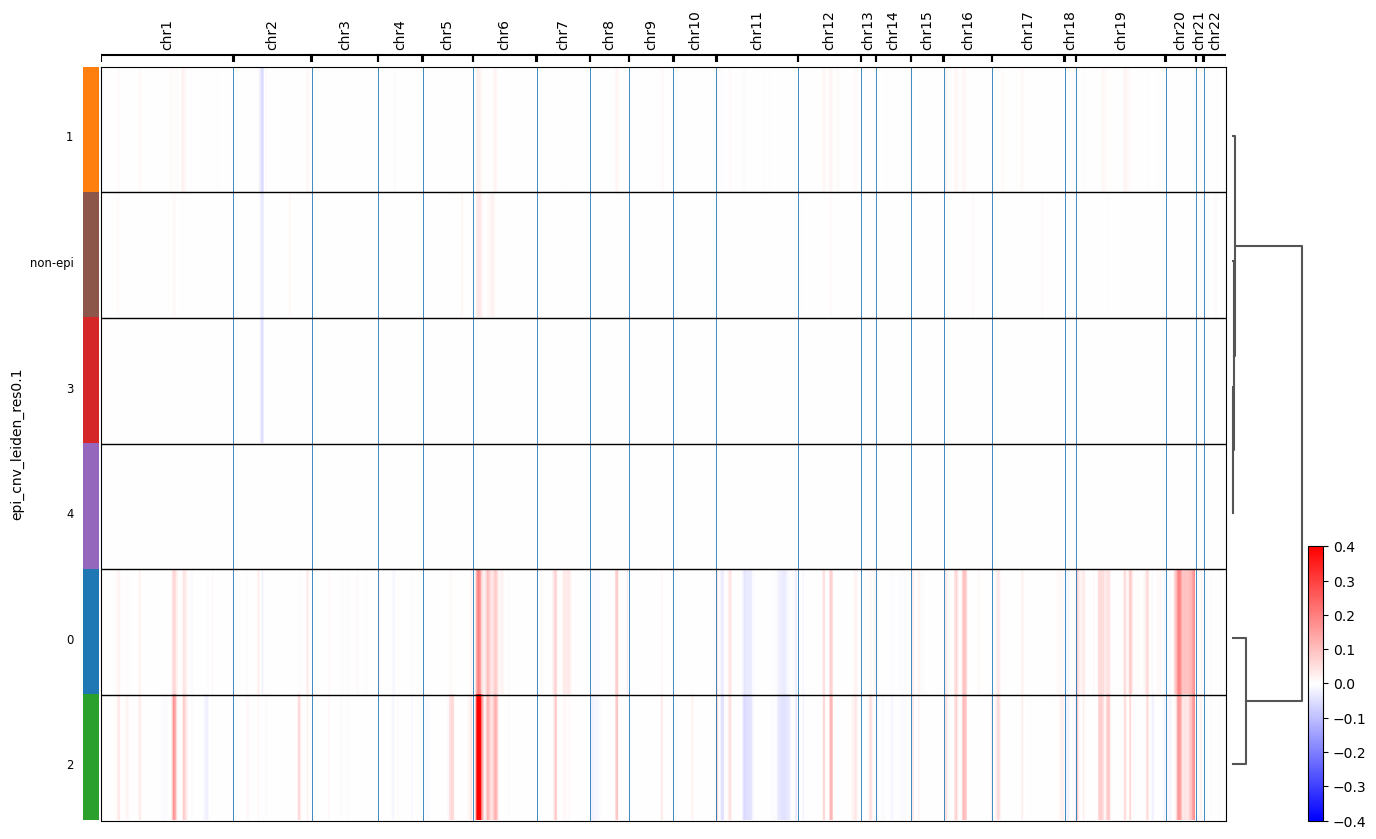

In [6]:
groupby='epi_cnv_leiden_res0.1'
save_heatmap = f"_summary_CosMx_{sid}_groupby-{groupby}.pdf"
# save_heatmap = None
cnv.pl.chromosome_heatmap_summary(adata, groupby=groupby, dendrogram=True, save=save_heatmap, vmin=-.4, vmax=0.4)

In [7]:
adata

AnnData object with n_obs × n_vars = 347023 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

In [10]:
print(adata.obsm['X_cnv'])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 42296611 stored elements and shape (347023, 1570)>
  Coords	Values
  (0, 220)	-0.02790912905420341
  (0, 221)	-0.04173320718315046
  (0, 222)	-0.05403790348250528
  (0, 223)	-0.0666897458074085
  (0, 224)	-0.07730429278873821
  (0, 225)	-0.06352778725969768
  (0, 226)	-0.04916811390802739
  (0, 227)	-0.03587638351230827
  (0, 539)	-0.027875186296079456
  (0, 1141)	-0.03252122445127872
  (0, 1142)	-0.02821763606874418
  (1, 104)	0.028285995577142446
  (1, 105)	0.03551809812873127
  (1, 106)	0.0426194225547963
  (1, 107)	0.03888257100570983
  (1, 108)	0.03181366291659537
  (1, 220)	-0.02727276539945902
  (1, 221)	-0.03757968666529575
  (1, 222)	-0.048903990801213784
  (1, 223)	-0.06269553900810469
  (1, 224)	-0.0753689094998545
  (1, 225)	-0.06441103140353316
  (1, 226)	-0.048458220703098194
  (1, 227)	-0.031012078424705665
  (1, 558)	0.032127964153803666
  :	:
  (347022, 227)	-0.031502509418162794
  (347022, 538)	-0.018997710

### Subset the data if too big
_________

In [6]:
# Get a random subset of 50% of the cell indices
subset_indices = np.random.choice(adata.n_obs, size=int(0.5 * adata.n_obs), replace=False)

# Subset the AnnData object
adata = adata[subset_indices, :].copy()

In [7]:
adata

AnnData object with n_obs × n_vars = 360125 × 18555
    obs: 'Unnamed: 0', 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'version', 'Run_name', 'Run_Tissue_name', 'tissue', 'Panel', 'assay_type', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'cell', 'sid', 'add_sub', 'ROI_status', 'healthy_ROI', 'n_counts'
    var: 'Unnamed: 0', 'start', 'end', 'width', 'names', 'gene_id', 'symbol', 'ensg', 'chromosome', 'features_all', 'features_epi'
    uns: 'ROI_status_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'
    layers: 'M', 'lognorm', 'raw'
    obsp: 'connectivities', 'distances'

### Run CNV inference and epithelial clustering
_______

In [6]:
# Select the smoothed count data
adata.X = adata.layers['M'].copy()
cnv.tl.infercnv(adata, 
                window_size =100,
                reference_key = 'ROI_status',
                reference_cat = ['REF'],
                chunksize = 1000)

  0%|          | 0/452 [00:00<?, ?it/s]

In [11]:
adata

AnnData object with n_obs × n_vars = 451314 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

In [13]:
adata.write('/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/data_from_borka/CosMx_242_CNVinf_noclust.h5ad', compression = 'gzip')

OSError: [Errno 9] Unable to synchronously create file (unable to open file: name = '/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/data_from_borka/CosMx_242_CNVinf_noclust.h5ad', errno = 9, error message = 'Bad file descriptor', flags = 13, o_flags = 242)

In [ ]:
# Select only the epithelial cells
adata_epi = adata[adata.obs.add_sub == 'epi'].copy()

cnv.tl.pca(adata_epi)
cnv.pp.neighbors(adata_epi)

resolutions=[0.1, 0.3, 0.5]
    
for res in resolutions:

    # Cluster only the epithelial cells
    print('leiden res', res)
    key_added=f'epi_cnv_leiden_res{res}'
    cnv.tl.leiden(adata_epi, resolution = res, key_added=key_added)

    # Add the epithelial clustering back to the whole snPATHOseq dataset
    adata.obs[key_added] = np.nan
    adata.obs.loc[adata_epi.obs_names, key_added] = adata_epi.obs[key_added]

    # Plot CNV heatmap with dentrogram and vmin and vmax for comparison.
    print('heatmap')
    adata.obs[key_added].fillna("non-epi", inplace=True)
    save_heatmap = f"_CosMx_{sid}_groupby-{key_added}.png"
    cnv.pl.chromosome_heatmap(adata, groupby=key_added, dendrogram=True, save=save_heatmap, vmin=-.4, vmax=0.4) #, vmin=-.4, vmax=.4)

    sc.pl.spatial(adata, color=key_added, spot_size=100)

In [ ]:
# Select only the epithelial cells and overwrite adata
adata = adata[adata.obs.add_sub == 'epi'].copy()

In [ ]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)

resolutions = [0.1, 0.3, 0.5]

for res in resolutions:
    print('leiden res', res)
    key_added = f'epi_cnv_leiden_res{res}'
    cnv.tl.leiden(adata, resolution=res, key_added=key_added)
    
    # Save clustering results as CSV
    adata.obs[[key_added]].to_csv(f'clustering_{key_added}.csv')

Restart kernel

In [3]:
adata = sc.read('/home/augusta/insituCNV/CosMx_120_CNVinf_noclust.h5ad')

categories: 0.0, 1.0, 2.0, etc.
var_group_labels: chr1, chr2, chr3, etc.


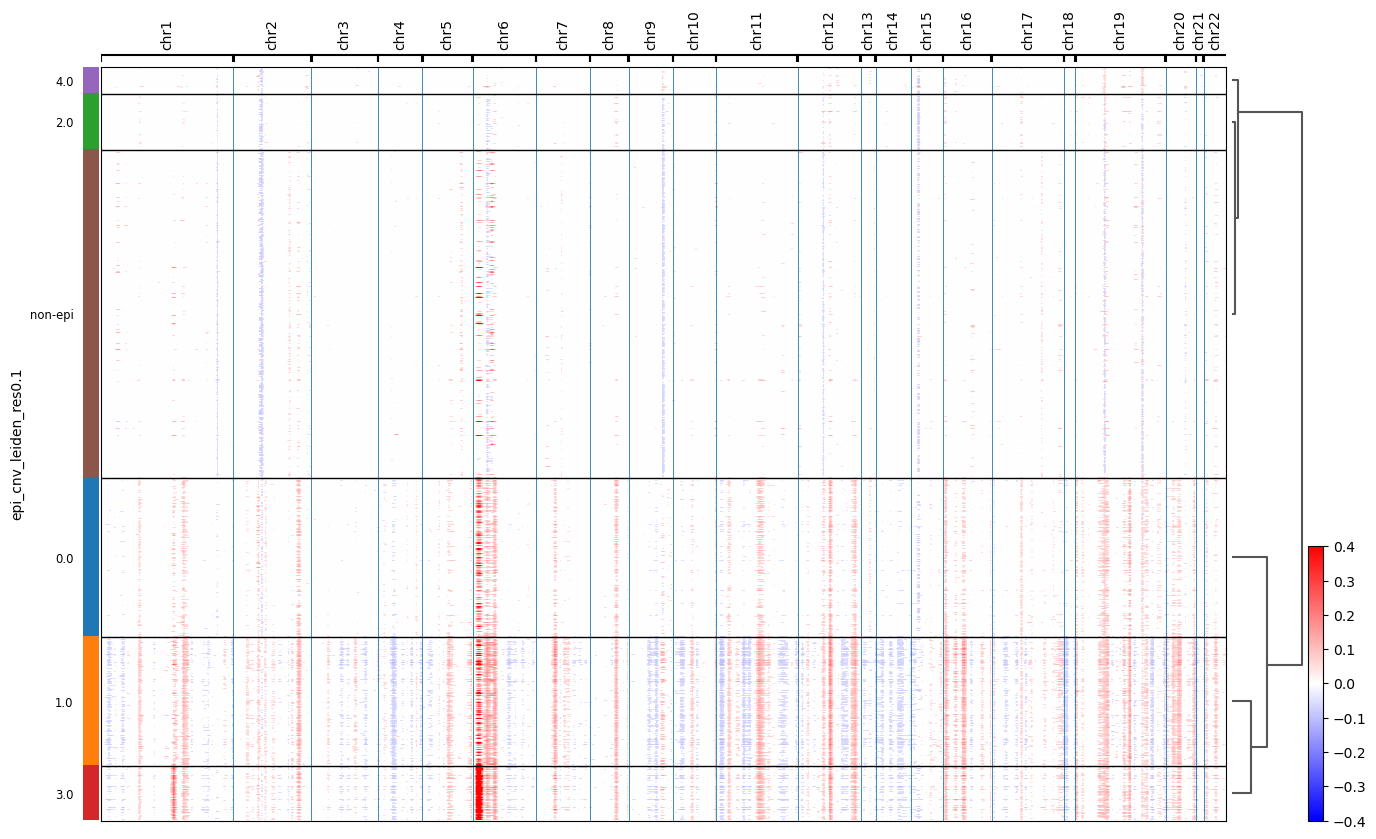

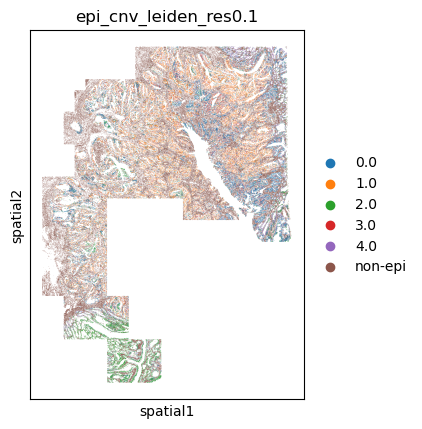

categories: 0.0, 1.0, 2.0, etc.
var_group_labels: chr1, chr2, chr3, etc.


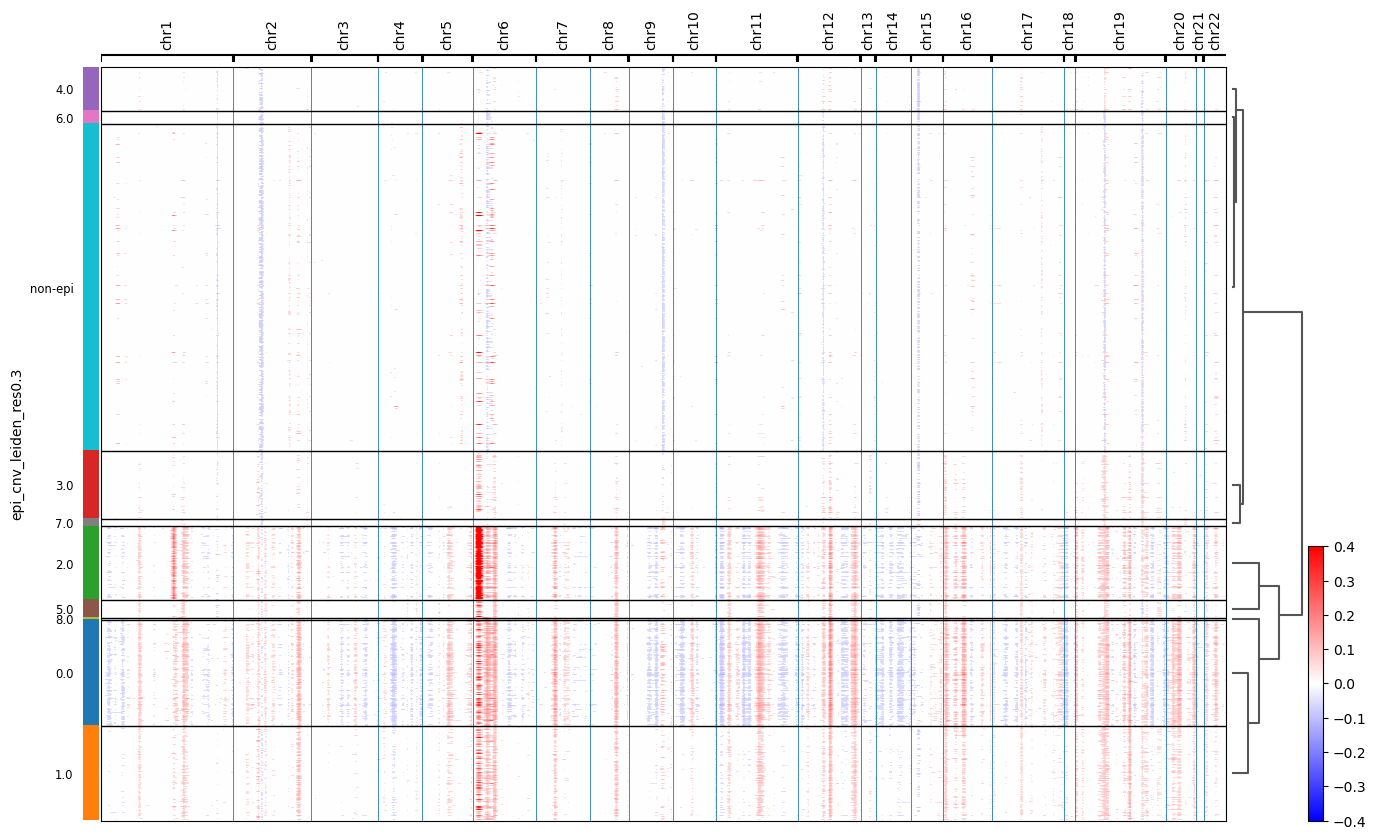

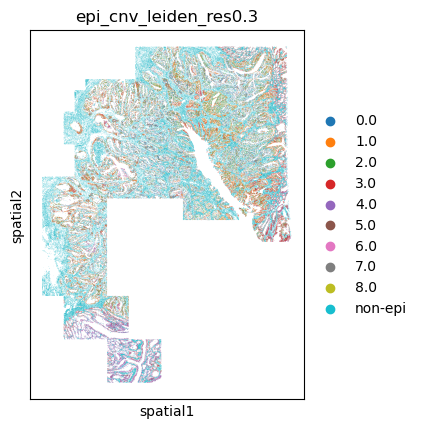

categories: 0.0, 1.0, 10.0, etc.
var_group_labels: chr1, chr2, chr3, etc.


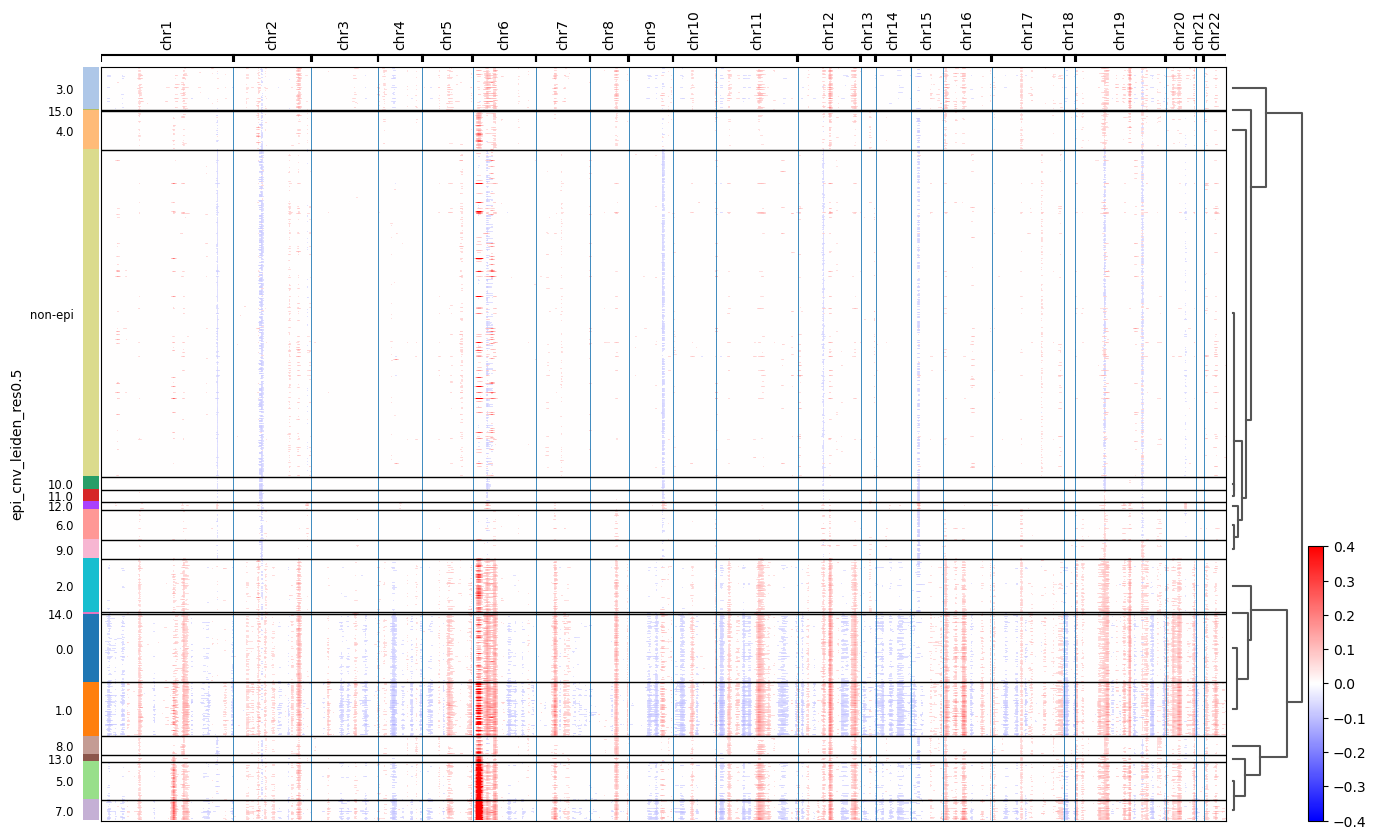

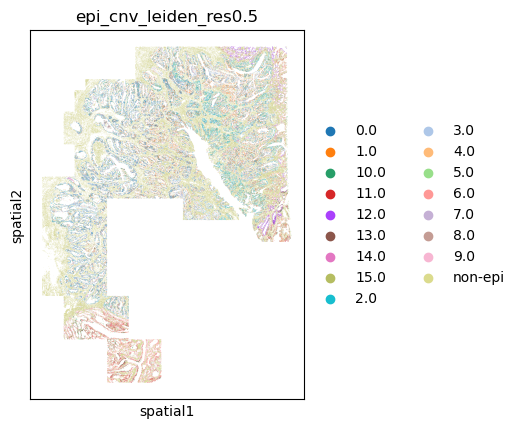

In [5]:
# Restart the notebook before running the next part
# After restarting, load the full adata and reintroduce the clustering annotations
sid = '120'

import scanpy as sc

resolutions = [0.1, 0.3, 0.5]

# Load clustering results and add them to adata
for res in resolutions:
    key_added = f'epi_cnv_leiden_res{res}'
    
    # Drop existing column if it exists to avoid conflicts
    if key_added in adata.obs.columns:
        adata.obs.drop(columns=[key_added], inplace=True)
    
    clustering = pd.read_csv(f'clustering_{key_added}.csv', index_col=0)

    # Ensure index alignment before merging
    clustering = clustering.reindex(adata.obs.index)
    adata.obs = adata.obs.join(clustering, how='left')
    adata.obs[key_added].fillna("non-epi", inplace=True)
    
    adata.obs[key_added] = adata.obs[key_added].astype(str)
    adata.obs[key_added] = adata.obs[key_added].astype('category')
        
    # Plot heatmap
    save_heatmap = f"_CosMx_{sid}_groupby-{key_added}.png"
    cnv.pl.chromosome_heatmap(adata, groupby=key_added, dendrogram=True, save=save_heatmap, vmin=-.4, vmax=0.4)
    
    # Plot spatial visualization
    sc.pl.spatial(adata, color=key_added, spot_size=100)

In [6]:
# For UMAP illustrations and CNV scores
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.umap(adata)

In [7]:
resolutions = [0.1, 0.3, 0.5]

# Load clustering results and add them to adata
for res in resolutions:
    groupby=f'epi_cnv_leiden_res{res}'
    key_added=f'epi_cnv_score_res{res}'
    cnv.tl.cnv_score(adata, groupby=groupby, key_added=key_added)

In [8]:
adata.write('/home/augusta/insituCNV/CosMx_120_CNVinf.h5ad', compression = 'gzip')

### Plot and save figures
_________

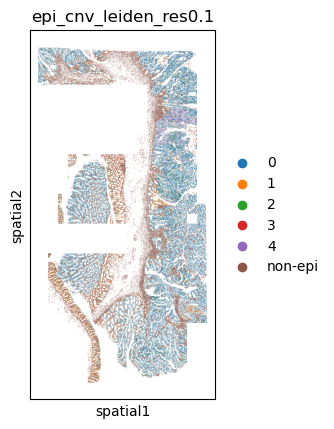

In [18]:
color='epi_cnv_leiden_res0.1'
# save=None
save=f'_CosMx_{sid}_groupby-{color}.png'
sc.pl.spatial(adata, color=color, spot_size=100, save=save)

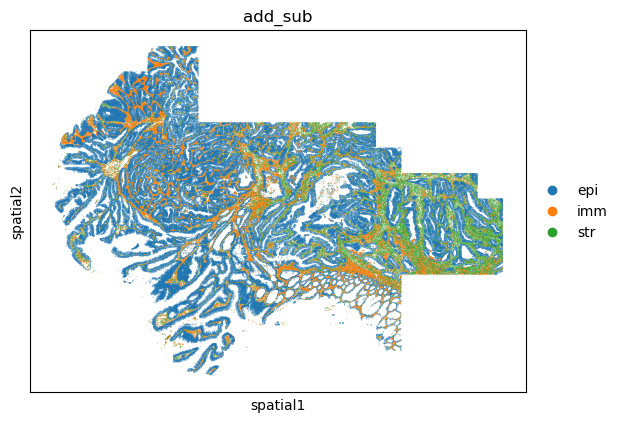

In [16]:
color='add_sub'
save=f'_CosMx_{sid}_groupby-{color}.pdf'
# save=None
sc.pl.spatial(adata, color=color, spot_size=100, save=save)

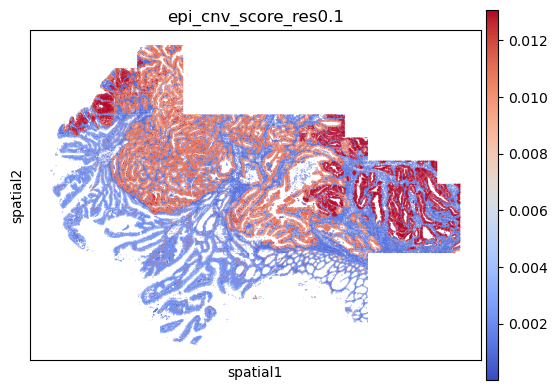

In [15]:
color='epi_cnv_score_res0.1'
save=f'_CosMx_{sid}_groupby-{color}.pdf'
# save=None
sc.pl.spatial(adata, color=color, cmap='coolwarm', spot_size=100, save=save)

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


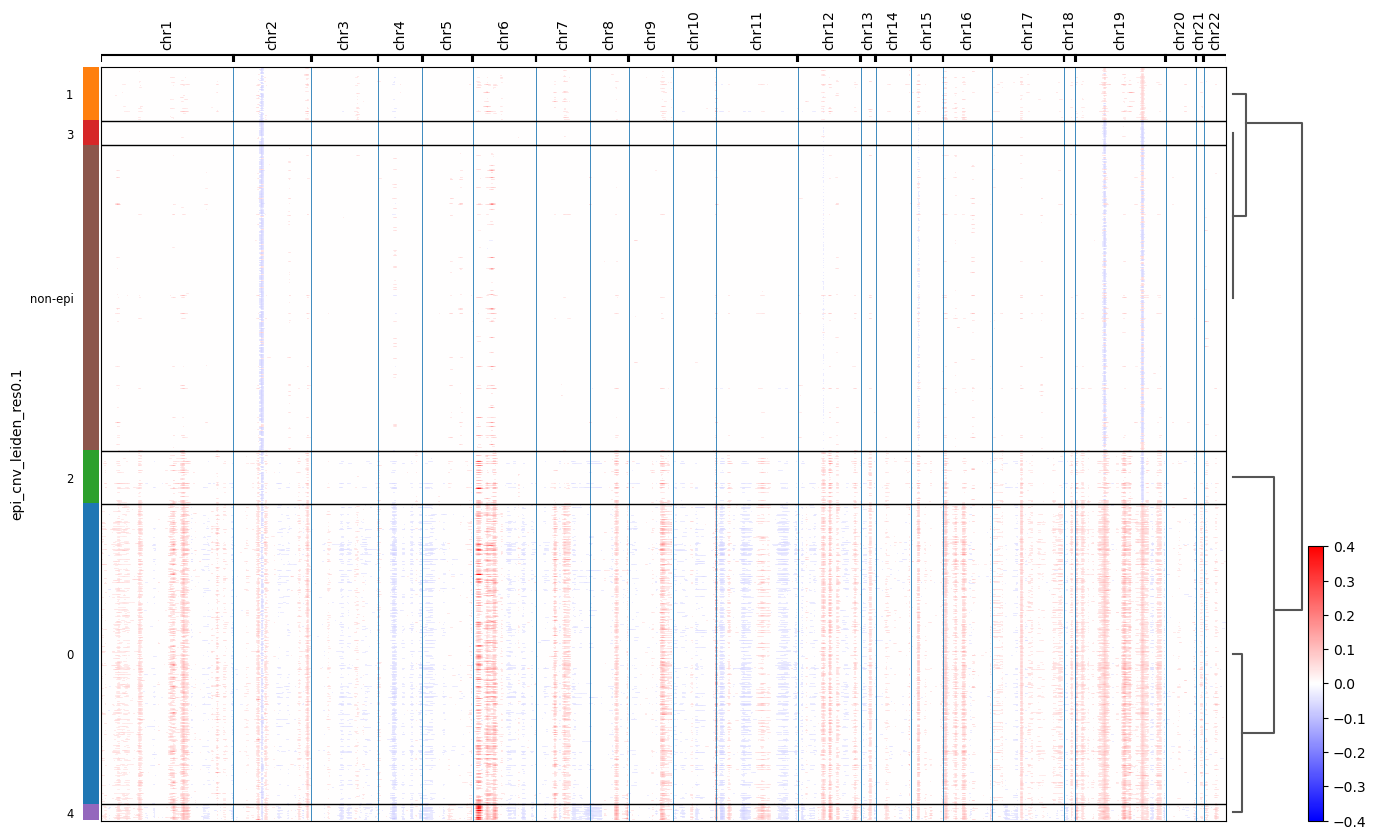

In [20]:
groupby='epi_cnv_leiden_res0.1'
save_heatmap = f"_CosMx_{sid}_groupby-{groupby}.pdf"
cnv.pl.chromosome_heatmap(adata, groupby=groupby, dendrogram=True, save=save_heatmap, vmin=-.4, vmax=0.4)

In [ ]:
color = 'epi_cnv_leiden_res0.1'
save = None
save = f"_CosMx_{sid}_groupby-{color}.pdf"
cnv.pl.umap(adata, color=color, save = save)

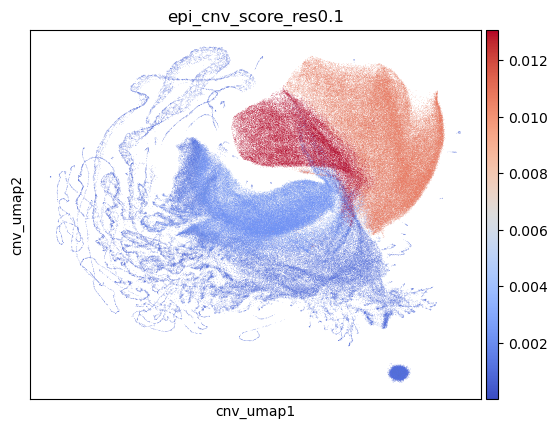

In [10]:
color='epi_cnv_score_res0.1'
save = f"_CosMx_{sid}_groupby-{color}.pdf"
# save =None
cnv.pl.umap(adata, color=color, cmap="coolwarm", save=save)

In [ ]:
color='epi_cnv_score_res0.1'
save = f"_CosMx_{sid}_groupby-{color}.pdf"
sc.pl.spatial(adata, color=color, cmap = 'coolwarm', spot_size=100, save=save)

### Save new adata object with CNV information
______

In [ ]:
# adata.write(f"/home/augusta/insituCNV/CosMx_{sid}_CNVinf.h5ad", compression = 'gzip')